In [1]:
!unzip /content/customer_bank.zip

Archive:  /content/customer_bank.zip
  inflating: Bank-Customer-Attrition-Insights-Data.csv  


In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/Bank-Customer-Attrition-Insights-Data.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
from scipy.stats import skew,kurtosis


In [5]:
numerical_features = ['Balance', 'CreditScore', 'Point Earned']

agg_stats = df[numerical_features].agg(['mean', 'median', 'std'])

skew_values = df[numerical_features].apply(skew).rename('Skewness')
kurtosis_values = df[numerical_features].apply(kurtosis).rename('Kurtosis')


summary_stats = pd.concat([agg_stats.T, skew_values, kurtosis_values], axis=1)


summary_stats = summary_stats.rename(
    columns={
        'mean': 'Mean',
        'median': 'Median',
        'std': 'Standard Deviation',
    }
)

print(summary_stats)

                      Mean    Median  Standard Deviation  Skewness  Kurtosis
Balance       76485.889288  97198.54        62397.405202 -0.141088 -1.489267
CreditScore     650.528800    652.00           96.653299 -0.071596 -0.426113
Point Earned    606.515100    605.00          225.924839  0.008343 -1.193784


In [6]:
summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df

,Mean,Median,Standard Deviation,Skewness,Kurtosis
Balance,76485.889288,97198.54,62397.405202,-0.141088,-1.489267
CreditScore,650.528800,652.00,96.653299,-0.071596,-0.426113
Point Earned,606.515100,605.00,225.924839,0.008343,-1.193784


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Gender Distribution:
 Gender
Male      5457
Female    4543
Name: count, dtype: int64


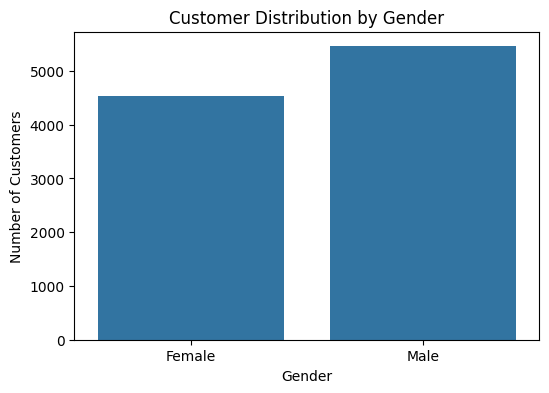

In [8]:
gender_counts = df['Gender'].value_counts()
print("Gender Distribution:\n", gender_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Customer Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()


Geography Distribution:
 Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


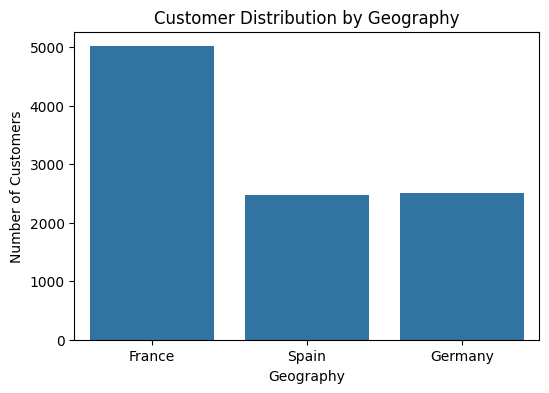

In [9]:
geography_counts = df['Geography'].value_counts()
print("\nGeography Distribution:\n", geography_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x='Geography', data=df)
plt.title('Customer Distribution by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.show()

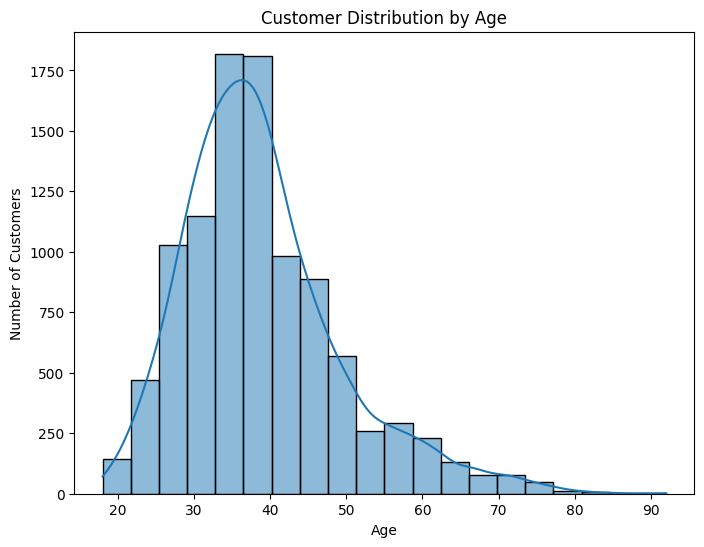

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)  # Histogram with KDE
plt.title('Customer Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

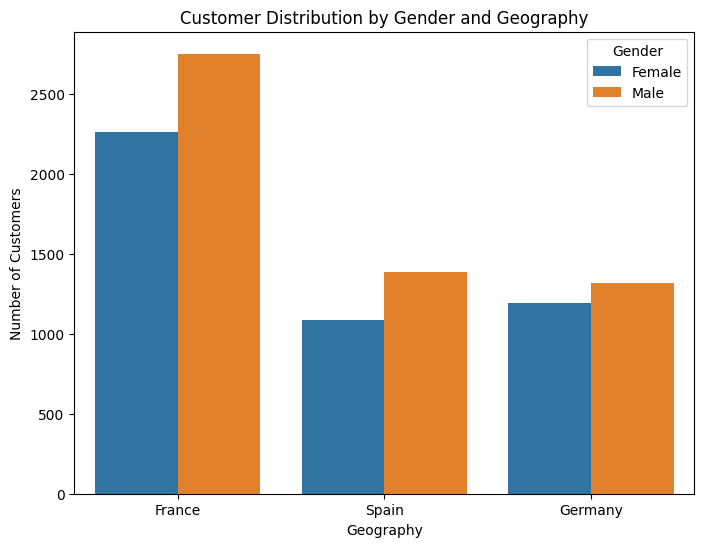

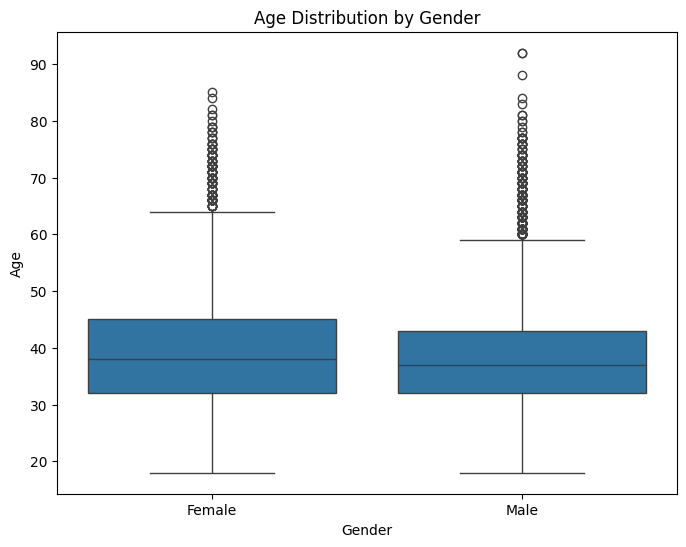

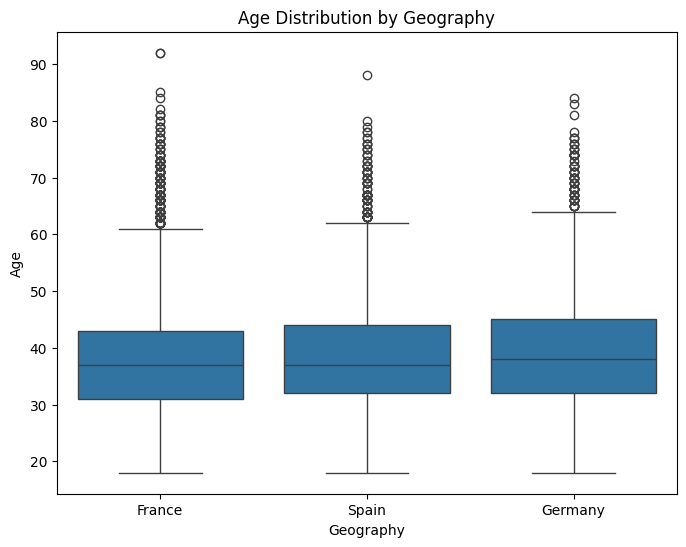

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Gender', data=df)
plt.title('Customer Distribution by Gender and Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Geography', y='Age', data=df)
plt.title('Age Distribution by Geography')
plt.xlabel('Geography')
plt.ylabel('Age')
plt.show()

In [13]:
import pandas as pd

df['TransactionCount'] = df['Point Earned']
transaction_stats = df.groupby('IsActiveMember')['TransactionCount'].agg(['min', 'max', 'mean'])


transaction_stats = transaction_stats.rename(
    columns={
        'min': 'Minimum',
        'max': 'Maximum',
        'mean': 'Average',
    }
)


print(transaction_stats)

                Minimum  Maximum     Average
IsActiveMember                              
0                   119     1000  607.675397
1                   206     1000  605.422831


                  CreditScore   Balance  TransactionCount
CreditScore          1.000000  0.006268          0.000077
Balance              0.006268  1.000000          0.014608
TransactionCount     0.000077  0.014608          1.000000


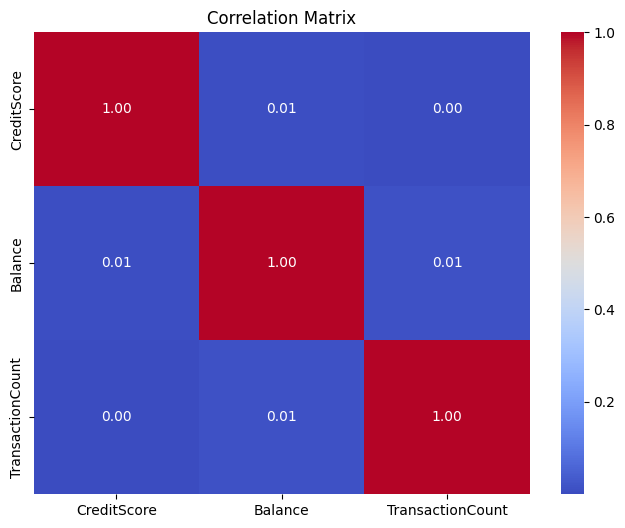

In [14]:
import pandas as pd
selected_features = ['CreditScore', 'Balance', 'TransactionCount']
data = df[selected_features]
correlation_matrix = data.corr()

print(correlation_matrix)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

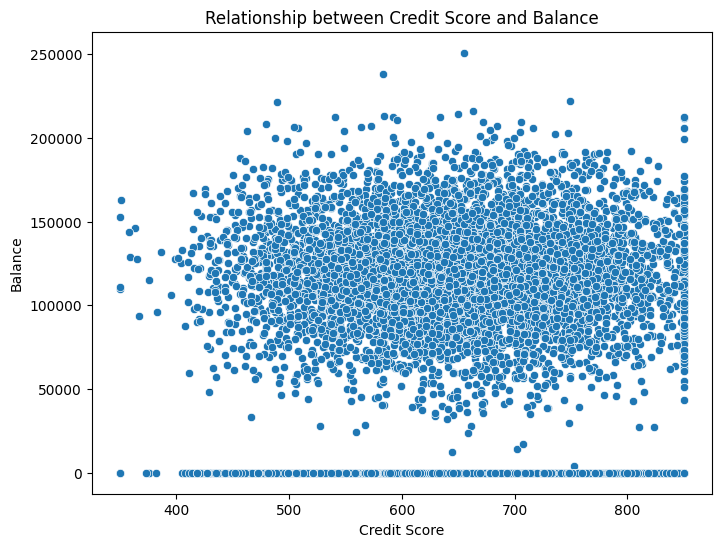

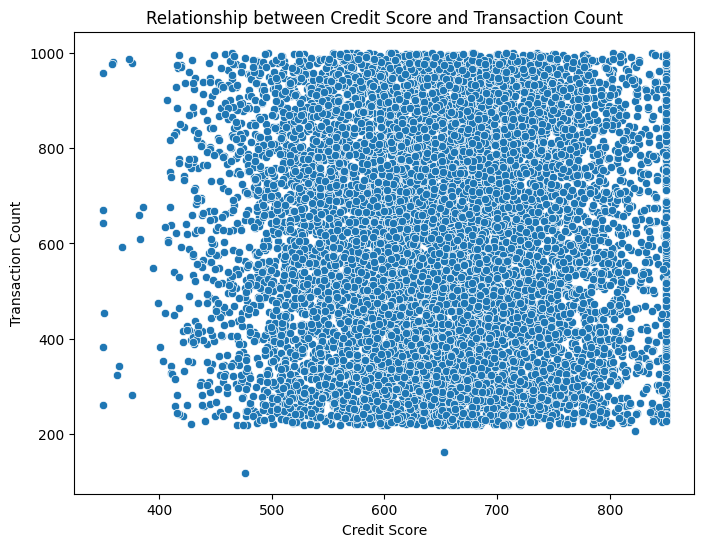

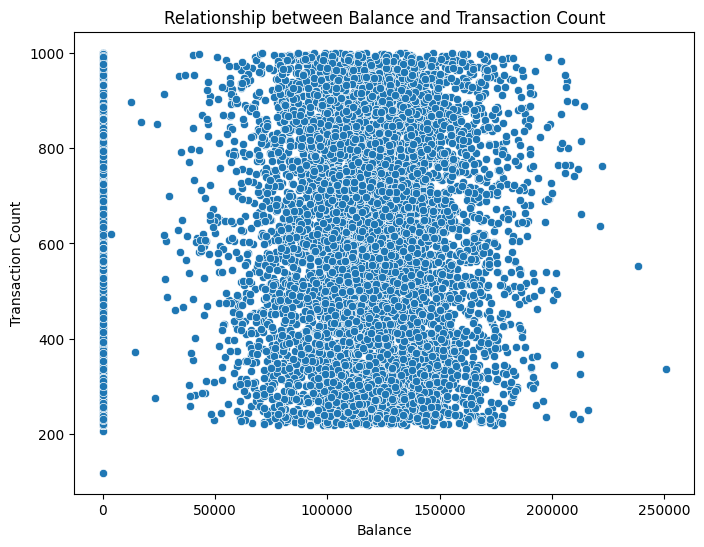

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='CreditScore', y='Balance', data=df)
plt.title('Relationship between Credit Score and Balance')
plt.xlabel('Credit Score')
plt.ylabel('Balance')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='CreditScore', y='TransactionCount', data=df)
plt.title('Relationship between Credit Score and Transaction Count')
plt.xlabel('Credit Score')
plt.ylabel('Transaction Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Balance', y='TransactionCount', data=df)
plt.title('Relationship between Balance and Transaction Count')
plt.xlabel('Balance')
plt.ylabel('Transaction Count')
plt.show()


Balance Statistics:
                 mean     median           std
Exited                                       
0       72742.750663   92063.06  62851.577108
1       91109.476006  109344.23  58346.483197

Transaction Count Statistics:
               mean  median         std
Exited                                
0       607.044084   603.0  226.091682
1       604.448479   610.5  225.315301


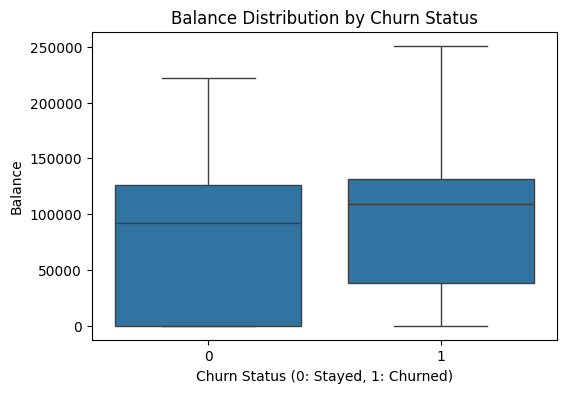

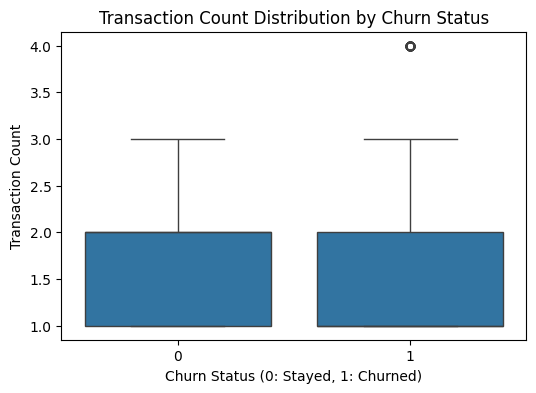

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


churn_groups = df.groupby('Exited')

balance_stats = churn_groups['Balance'].agg(['mean', 'median', 'std'])
transaction_stats = churn_groups['TransactionCount'].agg(['mean', 'median', 'std'])

print("Balance Statistics:\n", balance_stats)
print("\nTransaction Count Statistics:\n", transaction_stats)


plt.figure(figsize=(6, 4))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance Distribution by Churn Status')
plt.xlabel('Churn Status (0: Stayed, 1: Churned)')
plt.ylabel('Balance')
plt.show()


plt.figure(figsize=(6, 4))
sns.boxplot(x='Exited', y='NumOfProducts', data=df)
plt.title('Transaction Count Distribution by Churn Status')
plt.xlabel('Churn Status (0: Stayed, 1: Churned)')
plt.ylabel('Transaction Count')
plt.show()

In [20]:
credit_score_median = df['CreditScore'].median()
balance_median = df['Balance'].median()

low_credit_high_balance = df[(df['CreditScore'] < credit_score_median) & (df['Balance'] > balance_median)]

probability = len(low_credit_high_balance) / len(df)

print(f"The probability that a customer has both a low credit score and a high balance is: {probability:.4f}")

The probability that a customer has both a low credit score and a high balance is: 0.2478
